In [34]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from pathlib import Path

pd.set_option('display.max_columns', 150)

%matplotlib inline

In [35]:
data_path = Path('./data')
data = pd.read_csv(data_path /'Chicago_Crimes_2017.csv')
data.head(1)

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,Location Description,Arrest,Domestic,Beat,District,Ward,CommunityArea,FBICode,X Coordinate,Y Coordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,10801165,JA100077,01/01/2017 01:00:00 AM,0000X W DIVISION ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,1824,18.0,42.0,8.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN


Ejercicio 1

Genera un gráfico de barras que contenga el nº de siniestros ocurrido en cada mes del año. El gráfico será tal que así:

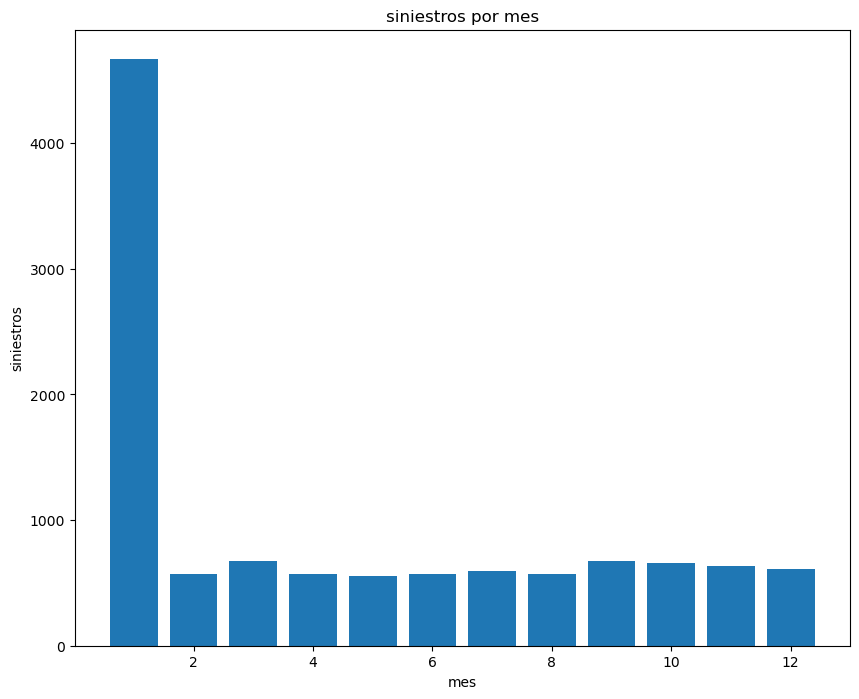

In [36]:
data['mes'] = pd.to_datetime(data['Date'], dayfirst=True).dt.month
agrup = data.groupby('mes').size()
fig1, ax1 = plt.subplots(figsize = (10, 8))
ax1.bar(x = agrup.index, height = data.groupby('mes').size().values)

ax1.set_title("siniestros / mes")
ax1.set_ylabel("siniestros")
ax1.set_xlabel('mes');

Ejercicio 2

Añade al gráfico anterior, usando puntos, el nº de siniestros cuyo Primary Type = 'Battery'.

Representa esos puntos usando el eje derecho.
Muestra una leyenda con el significado de ambos
El gráfico sería algo tal que así:

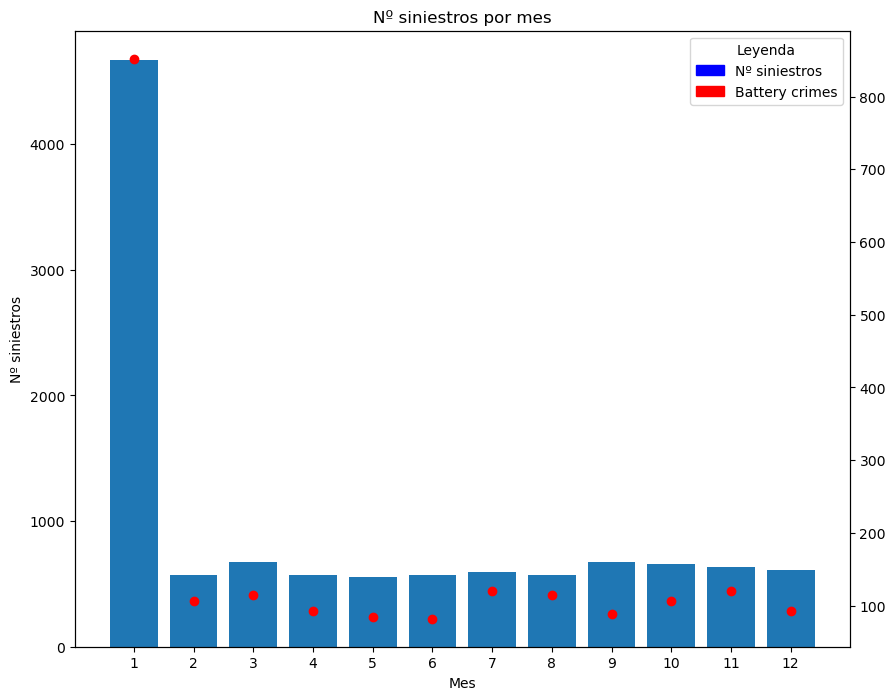

In [41]:
import matplotlib.patches as mpatches

crimes_by_month = data.groupby('mes').size()
crimes_battery = data[data['PrimaryType'] == "BATTERY"].groupby('mes').size()


fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(x = crimes_by_month.index, height = crimes_by_month.values, label = 'Nº Siniestros')
ax.set_xticks(np.arange(1,13))
ax.set_title("Nº siniestros por mes")
ax.set_ylabel("Nº siniestros")
ax.set_xlabel('Mes')

ax1 = ax.twinx()
ax1.scatter(x = crimes_battery.index, y = crimes_battery.values, c = 'red', label = 'Battery crimes')

bar = mpatches.Patch(color='blue', label='Nº siniestros')
point = mpatches.Patch(color='red', label='Battery crimes')
plt.legend(handles=[bar, point], title = 'Leyenda');

Ejercicio 3

Filtra solo los siniestros cuyo Primary Type son "THEFT", "BATTERY", "CRIMINAL DAMAGE" o "OTHER OFFENSE". Luego, genera 2 gráficos en el mismo fig.

El primero, será un gráfico de tartas que muestre el % que representa cada tipo en el dataset.

El segundo, será un gráfico de puntos, representando el nº de siniestros de cada tipo en cada mes.

In [17]:
grp = data.query('PrimaryType in ["THEFT", "BATTERY", "CRIMINAL DAMAGE", "OTHER OFFENSE"]').groupby(['PrimaryType','mes'])
grp.size()

PrimaryType      mes
BATTERY          1       852
                 2       106
                 3       114
                 4        93
                 5        84
                 6        82
                 7       120
                 8       115
                 9        89
                 10      106
                 11      120
                 12       93
CRIMINAL DAMAGE  1       538
                 2        72
                 3        81
                 4        54
                 5        67
                 6        68
                 7        59
                 8        68
                 9        88
                 10       93
                 11       56
                 12       61
OTHER OFFENSE    1       328
                 2        42
                 3        44
                 4        47
                 5        50
                 6        40
                 7        42
                 8        56
                 9        48
                 10   

In [20]:
grp.size().unstack()

mes,1,2,3,4,5,6,7,8,9,10,11,12
PrimaryType,,,,,,,,,,,,
BATTERY,852,106,114,93,84,82,120,115,89,106,120,93
CRIMINAL DAMAGE,538,72,81,54,67,68,59,68,88,93,56,61
OTHER OFFENSE,328,42,44,47,50,40,42,56,48,54,56,67
THEFT,1055,112,132,156,122,118,114,103,152,146,140,143


In [29]:
grp.size().unstack().T

PrimaryType,BATTERY,CRIMINAL DAMAGE,OTHER OFFENSE,THEFT
mes,,,,
1,852,538,328,1055
2,106,72,42,112
3,114,81,44,132
4,93,54,47,156
5,84,67,50,122
6,82,68,40,118
7,120,59,42,114
8,115,68,56,103
9,89,88,48,152


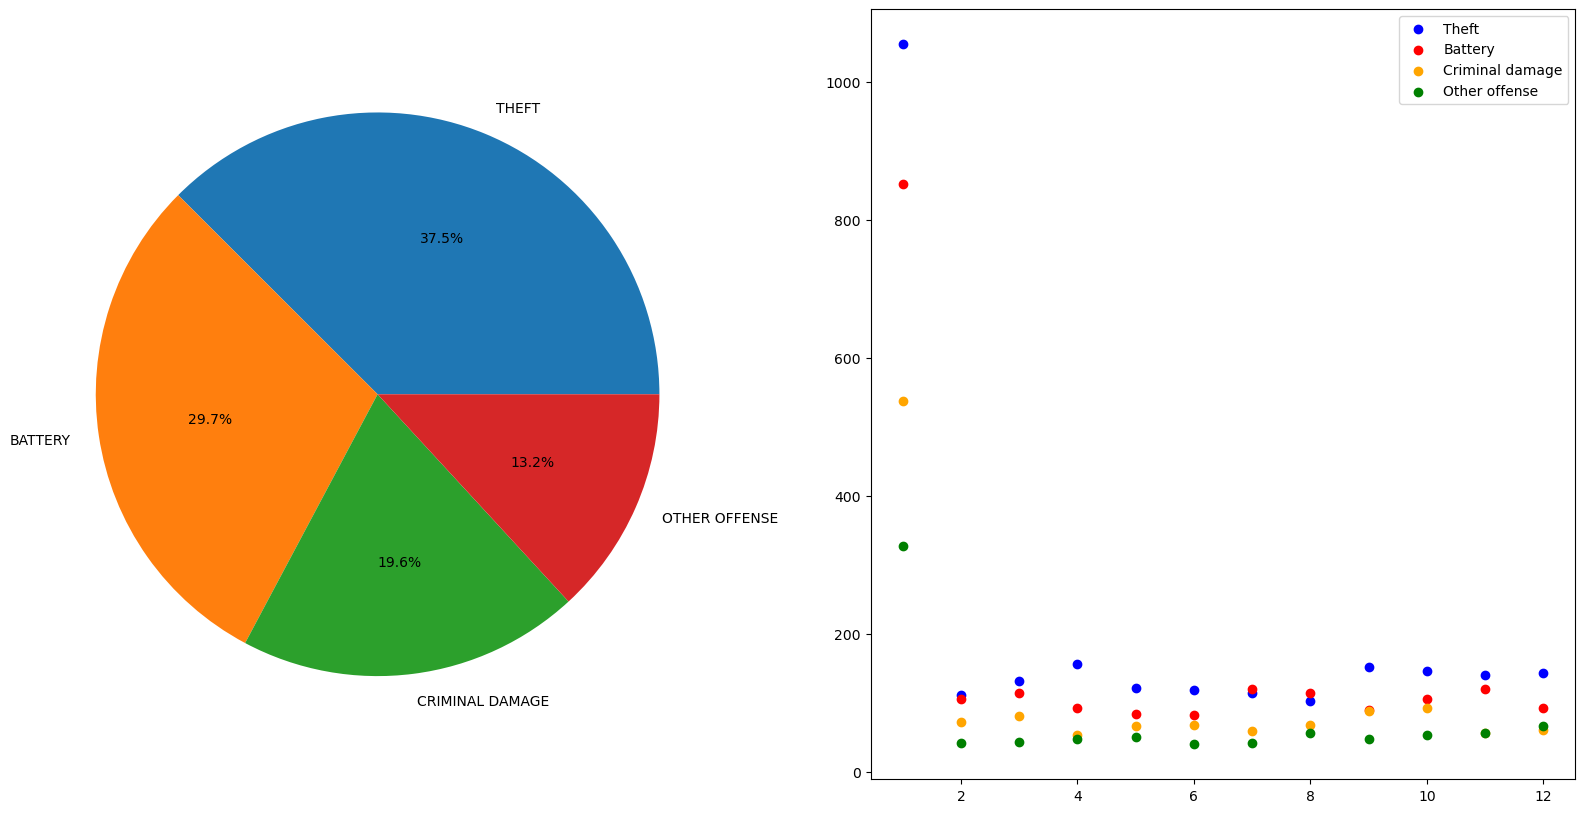

In [42]:
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

df = data.query('PrimaryType in ["THEFT", "BATTERY", "CRIMINAL DAMAGE", "OTHER OFFENSE"]')
vc = df.PrimaryType.value_counts()
num = df.groupby(['PrimaryType', 'mes']).size().unstack().T

ax[0].pie(vc, labels = vc.index, autopct='%1.1f%%')
ax[1].scatter(x = num.index, y = num['THEFT'], c = 'blue', label = 'Theft')
ax[1].scatter(x = num.index, y = num['BATTERY'], c = 'red', label = 'Battery')
ax[1].scatter(x = num.index, y = num['CRIMINAL DAMAGE'], c = 'orange', label = 'Criminal damage')
ax[1].scatter(x = num.index, y = num['OTHER OFFENSE'], c = 'green', label = 'Other offense')
ax[1].legend();